## kaggle实战---泰坦尼克号
## 根据乘客信息，预测该名乘客是否被获救，0：表示未获救，1：表示获救

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### 第一步 数据加载/收集

In [4]:
# 1. 读取训练集和测试集数据
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

### 第二部 数据探索分析

In [5]:
train.shape # 查看训练集的数据量和形状

(891, 12)

In [6]:
train.head() # 默认显示5行训练集数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info() # 查看训练集数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.shape # 查看测试集的数据量和形状

(418, 11)

In [9]:
test.head() # 默认显示5行测试集数据

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test.info() # 查看测试集数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# 合并train和test，形成一个数据集，进行统一数据清理、特征构建
dataset = pd.concat([train, test], axis=0).reset_index(drop=True) # drop=True 把原来的索引index列去掉

In [12]:
dataset.shape # 查看总的数据集，1309行数据，12列

(1309, 12)

In [13]:
dataset.head() # 查看总数据集的默认前5行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# 用NaN填充空缺的地方
dataset = dataset.fillna(np.nan)

In [15]:
# 检查Null值，统计一些数据集中有哪些字段存在NaN值
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
# 查看数据集类型
dataset.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
# 查看train训练集的描述
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# 查看test的描述
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 第三步 数据可视化展示

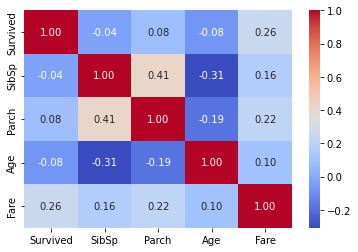

In [19]:
# 3.1 相关性矩阵，查看这些列之间是否有相关性
# 列：SibSp, Parch, Age, Fare, Survived
g = sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), 
                annot=True, cmap='coolwarm', fmt='.2f')

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


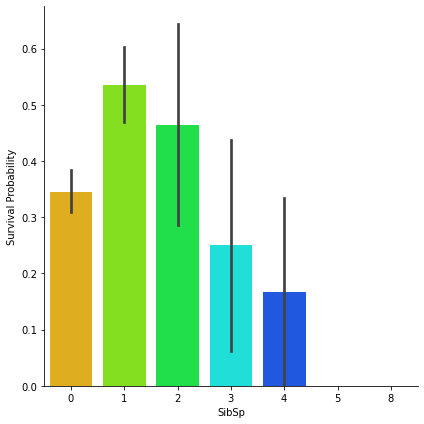

In [23]:
# 3.2 查看Survived 与 SibSp 之间的关联性
# 即 生成率是否与船上兄弟姐妹和配偶人数有关
g = sns.factorplot(x='SibSp', y='Survived', data=train, 
                   kind='bar', size=6, palette='hsv') # 抽取数据
g = g.set_ylabels('Survival Probability')

#### 如上图所示，Survived 明显与SibSp负相关，乘客只有1位或2位兄妹和配偶获救的概率最大

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


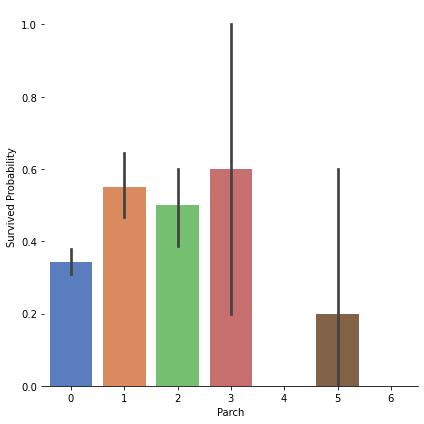

In [26]:
# 3.3 查看Survived 与 Parch 之间的相关性（生存率 VS 父母和子女数量）
g = sns.factorplot(x='Parch', y='Survived', data=train, kind='bar', size=6, palette='muted')
g.despine(left=True)
g = g.set_ylabels('Survived Probability')

#### 如上图所示，乘客拥有1-3名父母和子女的数量，获救的概率最大

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


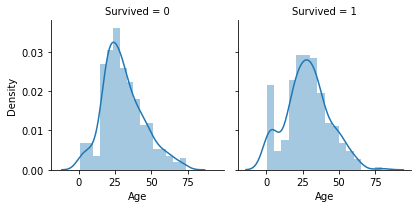

In [27]:
# 3.4 方法1：查看Survived 与 Age 之间的相关性（生存率 VS 年龄）
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, 'Age')

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


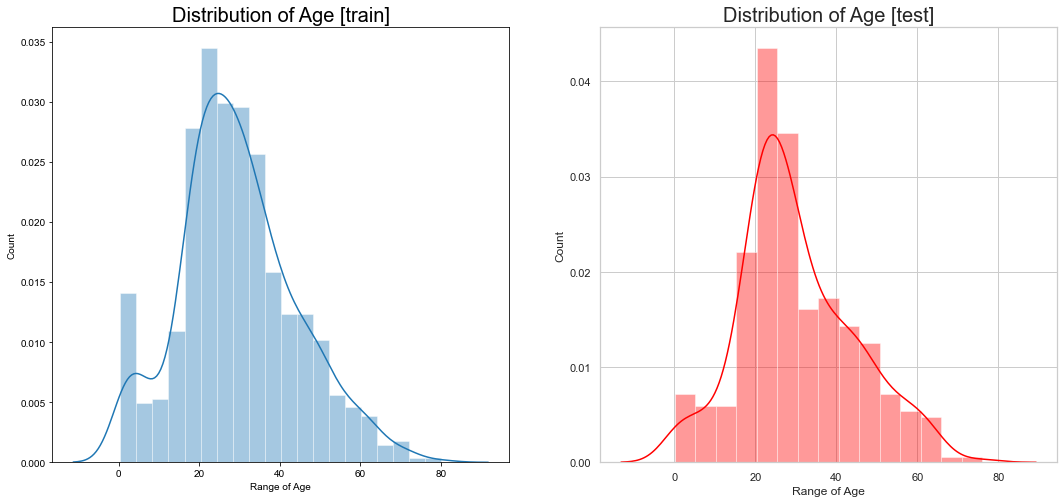

In [28]:
# 3.5 方法2：查看Survived 与 Age 之间的相关性（生存率 VS 年龄）

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (18, 8) # 画布大小

# 第一个图表 train.age 训练集年龄
plt.subplot(1, 2, 1)  # 1行2列 1号位置
sns.set(style='whitegrid')  # 背景格式
sns.distplot(train['Age'])  # 数据
plt.title("Distribution of Age [train]", fontsize=20) # 标题
plt.xlabel("Range of Age") # 横轴
plt.ylabel("Count") # 纵轴

# 第二个图表 test.age 测试集年龄
plt.subplot(1, 2, 2)
sns.set(style='whitegrid') # 背景格式
sns.distplot(test['Age'], color='red') # 数据
plt.title('Distribution of Age [test]', fontsize=20) # 标题
plt.xlabel('Range of Age') # 横轴
plt.ylabel('Count') # 纵轴
plt.show() # 显示

#### 根据上面2张图，明显观察到年龄范围在20 ~ 45岁之间的人，获救生存下来的概率最大

In [29]:
# 3.6 查看字段：Fare（票价）为空的数量
dataset['Fare'].isnull().sum()

1

In [30]:
# 3.7 用中位数填充这个空值
dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


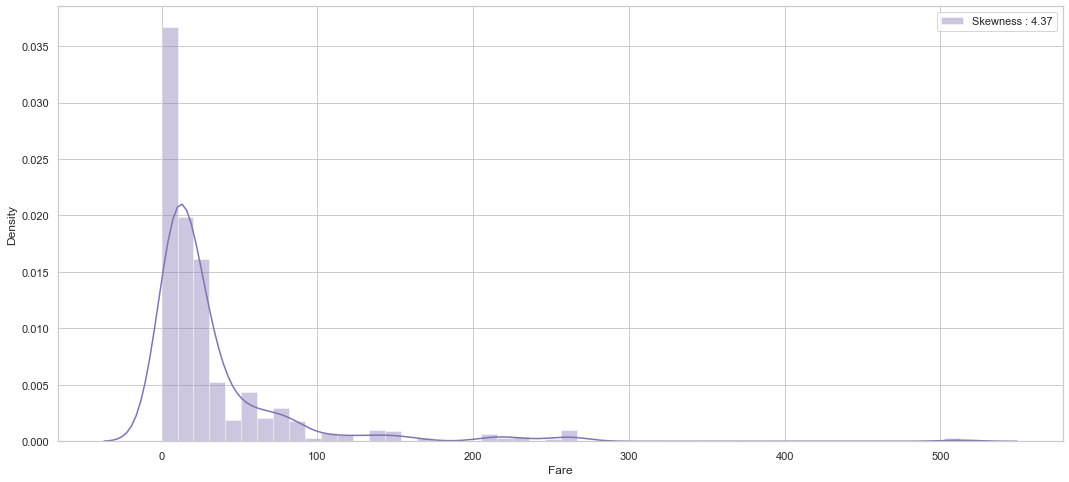

In [31]:
# 3.8 查看Fare（票价）的分布
# 偏度skewness，统计数据分布偏斜方向和程度的度量
g = sns.distplot(dataset['Fare'], color='m', label='Skewness : %.2f'%(dataset['Fare'].skew()))
g = g.legend(loc='best')

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


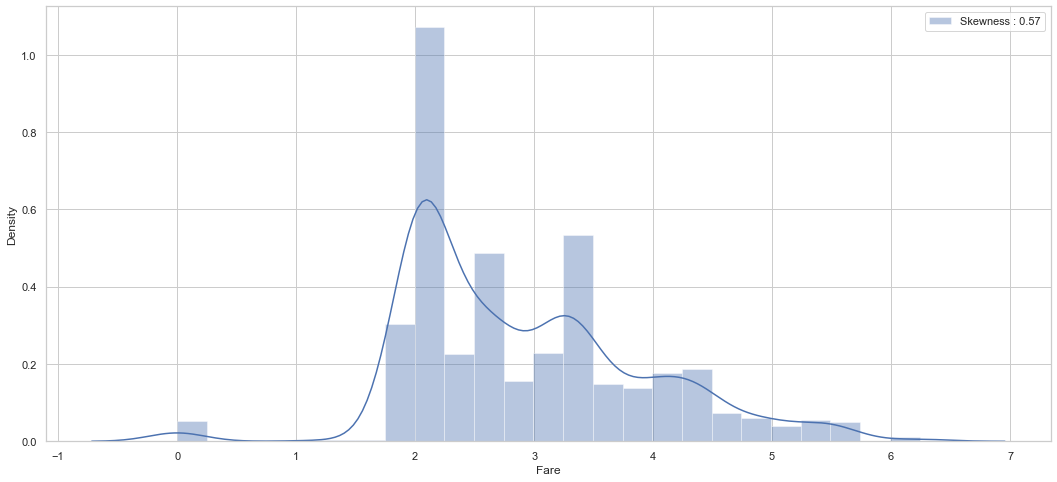

In [32]:
# 3.9 由于Fare(票价)偏度过大，即数值过大，需要进行归一化
dataset['Fare'] = dataset['Fare'].map(lambda i:np.log(i) if i > 0 else 0) # 对Fare求对数
# 3.10 再次绘制Fare 分布图
g = sns.distplot(dataset['Fare'], color='b', 
                 label='Skewness : %.2f'%(dataset['Fare'].skew()))
g = g.legend(loc='best')

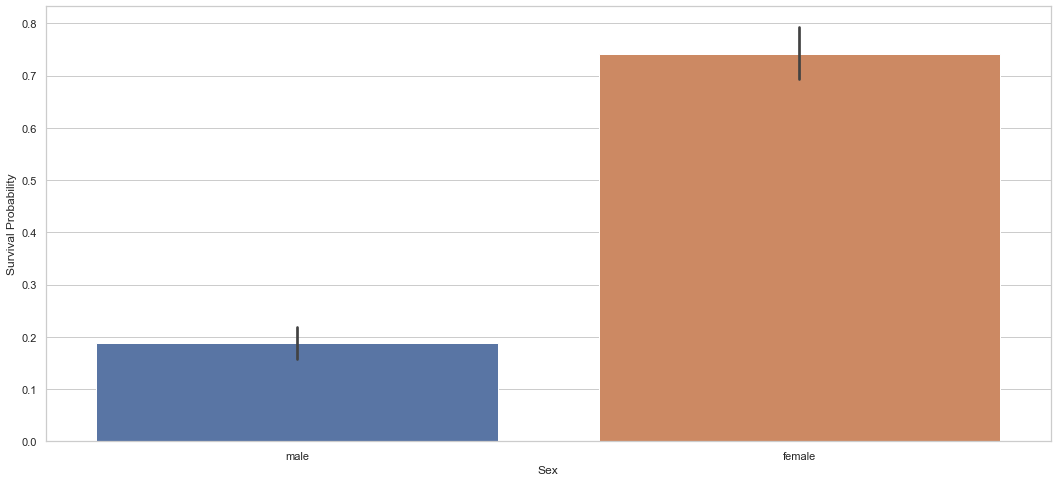

In [33]:
# 3.11 查看Survived  与 sex 之间的相关性
g = sns.barplot(x='Sex', y='Survived', data=train)
g = g.set_ylabel('Survival Probability')

#### 如上图所示，女性获救生存的概率远远大于男性

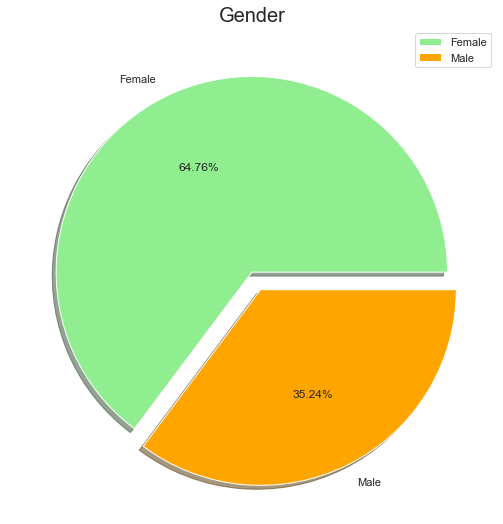

In [34]:
# 3.12 查看Sex 的分布 饼图展示

labels = ['Female', 'Male']  # 性别标签
size = train['Sex'].value_counts()  # 性别统计
colors = ['lightgreen', 'orange']  # 颜色配置
explode = [0, 0.1]  # 饼图参数
plt.rcParams['figure.figsize'] = (9, 9)  # 画布大小
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')  # 饼图参数设置
plt.title('Gender', fontsize=20)  # 标题
plt.axis('off')  # 关闭坐标轴
plt.legend()  # 显示标签
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


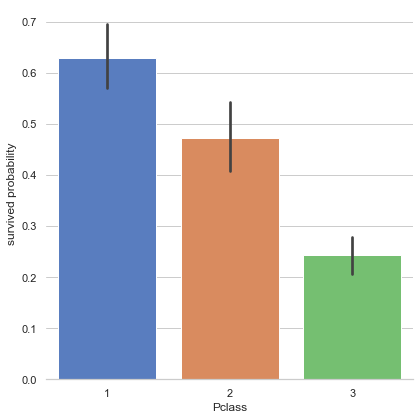

In [35]:
# 3.13 查看 Pclass(船舱) 与 Survived 之间的相关性

g = sns.factorplot(x='Pclass', y='Survived', data=train,
                  kind='bar', size=6, palette='muted')
g.despine(left=True)
g =g.set_ylabels('survived probability')

#### 如上图所示，注册头等舱的乘客获救生存概率远远大于三等舱的乘客。

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


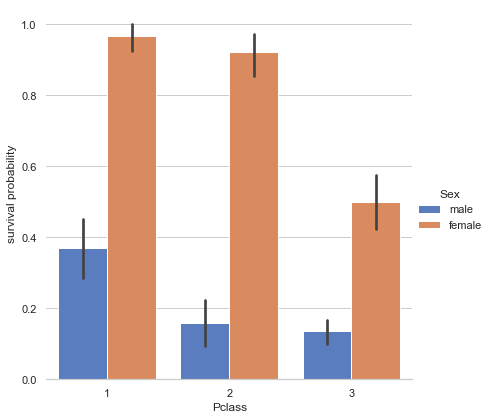

In [36]:
# 3.14 更进一步：考虑Sex（性别）因素，查看 Pclass（船舱）与 Survived之间的相关性
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', 
                   data=train, size=6, kind='bar', palette='muted')
g.despine(left=True)
g = g.set_ylabels('survival probability')

#### 如上图所示，住在头等舱的女性乘客获救生存的概率远远大于三等舱

In [37]:
# 3.15 查看 Emvarked（港口）是否为空的数量
dataset['Embarked'].isnull().sum()

2

In [38]:
# 3.16 填充Embarked的空值，用最常出现的港口名称‘S’作为填充值
dataset['Embarked'].fillna('S', inplace=True)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


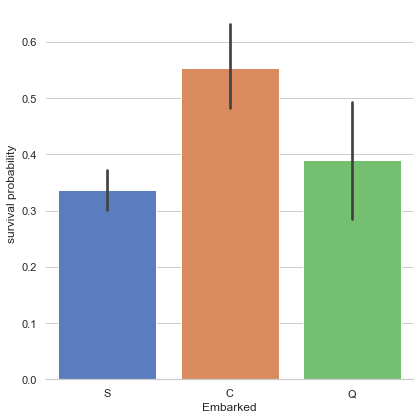

In [39]:
# 3.17 查看 Embarked 与 Survivied 之间的相关性

g = sns.factorplot(x='Embarked', y='Survived', data=train, 
                   size=6, kind='bar', palette='muted')
g.despine(left=True)
g = g.set_ylabels('survival probability')

#### 在港口C登船的乘客获救生存的概率大于其它码头登船的乘客

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


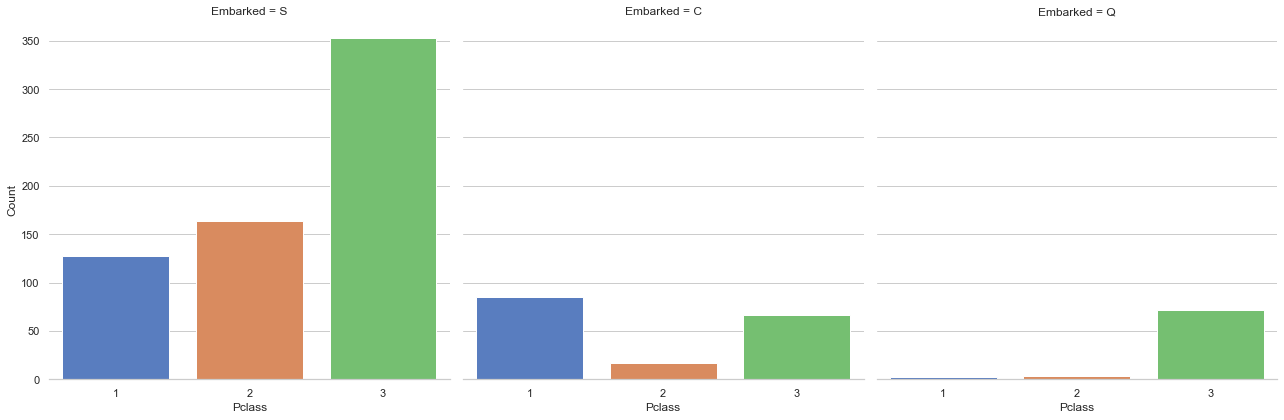

In [40]:
# 3.18 查看 Pclass 与 Embarked 之间的相关性

g = sns.factorplot('Pclass', col='Embarked', data=train, 
                   size=6, kind='count', palette='muted')
g.despine(left=True)
g = g.set_ylabels('Count')

#### 如上图所示，在码头S登船的乘客获救的概率远远大于其它两者

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


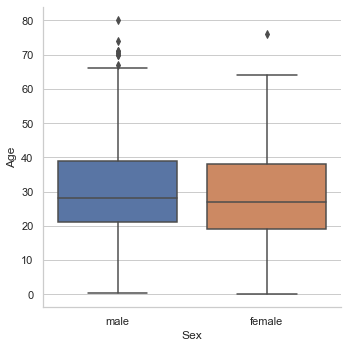

In [41]:
# 3.19 查看Age和Sex之间的相关性
g = sns.factorplot(y='Age', x='Sex', data=dataset, kind='box')

#### 如上图所示，男性和女性的年龄都集中于20岁 -- 40岁之间

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


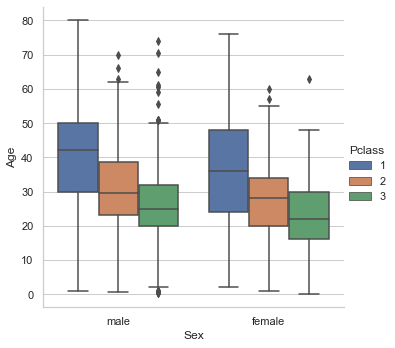

In [42]:
# 3.20 查看Age Sex 和 Pclass 之间的相关性
g = sns.factorplot(y='Age', x='Sex', hue='Pclass', data=dataset, kind='box')

#### 如上图所示，男性和女性分别在不同等级舱室的分布基本上一致

In [43]:
# 3.21 将Sex名义变量转换为0和1，Male：0，Female：1
dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1})

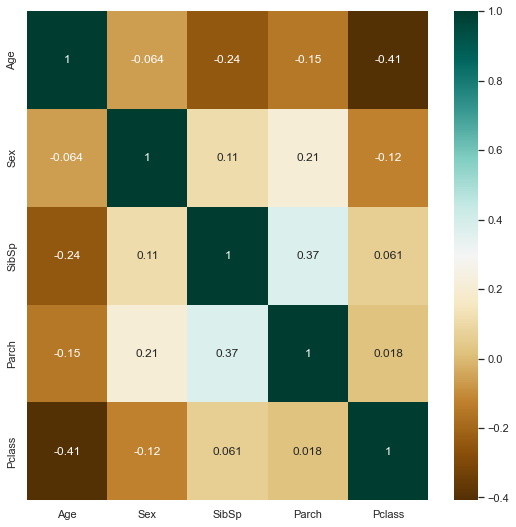

In [44]:
# 3.22 查看各列之间的相关系数：Age, Sex, SibSp, Parch, Pclass
g = sns.heatmap(dataset[['Age', 'Sex', 'SibSp', 'Parch', 'Pclass']].corr(), cmap='BrBG', annot=True)

In [45]:
# 3.23 填充年龄的缺失值

# 获取到年龄空缺值的索引 index
index_NaN_age = list(dataset[dataset['Age'].isnull()].index)

# 如果Age缺失对应行的其它字段：Pclass, Parch and SibPb与其它行的数据一致，那么，就假设年龄一致。
for i in index_NaN_age:
    age_median = dataset['Age'].median() # 整个数据集的年龄中位数
    age_similar = dataset['Age'][((dataset['SibSp']==dataset.iloc[i]['SibSp']) & 
                                  (dataset['Parch']==dataset.iloc[i]['Parch']) & 
                                  (dataset['Pclass']==dataset.iloc[i]['Pclass']))].median()
    if not np.isnan(age_similar):
        dataset['Age'].iloc[i] = age_similar
    else:
        dataset['Age'].iloc[i] = age_median

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


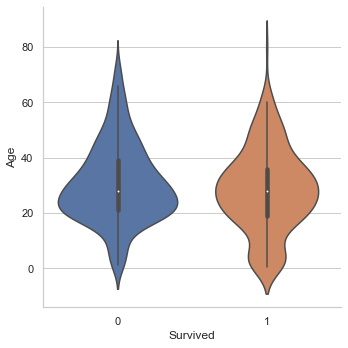

In [46]:
# 3.24 查看Age 和 Survived 之间的分布
g = sns.factorplot(x='Survived', y='Age', data=train, kind='violin')

### 第四步：特征工程

### 4.1 Name 分析

In [47]:
# 查看姓名的数据
dataset['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [49]:
# 获取到Name的title
name_title = [name.split(",")[1].split('.')[0].strip() for name in dataset['Name']]

In [50]:
# 新建字段：Title
dataset['Title'] = pd.Series(name_title)

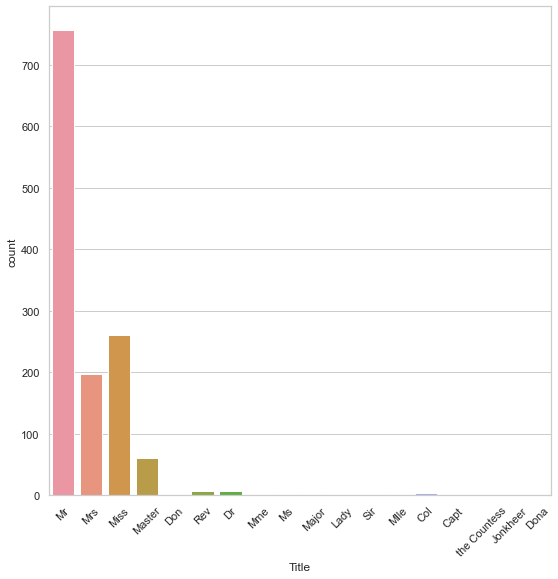

In [51]:
# 显示 Title 的分布
g = sns.countplot(x='Title', data=dataset)
# 横坐标值选择45度
g = plt.setp(g.get_xticklabels(), rotation=45)

#### 如上图所示，头衔：Mr的人数最多，其次是：Mrs + Miss

In [52]:
# 将那些很少出现的title归为一类：other
rare_titles = [t for t in set(name_title) if t not in ['Mr', 'Mrs', 'Miss', 'Master']]

In [53]:
rare_titles

['Sir',
 'Major',
 'Jonkheer',
 'Col',
 'Lady',
 'Don',
 'Dr',
 'Ms',
 'Mlle',
 'Mme',
 'Capt',
 'the Countess',
 'Rev',
 'Dona']

In [54]:
# 替换
dataset['Title'] = dataset['Title'].replace(rare_titles, 'other')

In [55]:
# 将名义变量转换为数值型
dataset['Title'] = dataset['Title'].map({
    'Master':0,
    'Miss':1,
    'Mrs':1,
    'Mr':2,
    'other':3
})

In [56]:
dataset['Title'] = dataset['Title'].astype('int') # int类型

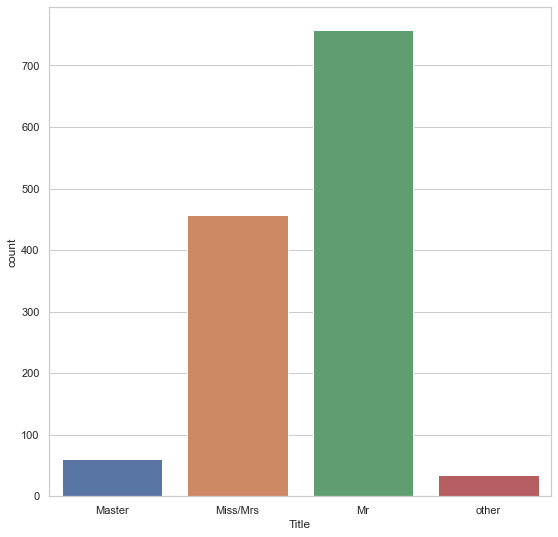

In [57]:
# 查看Title分布
g = sns.countplot(x='Title', data=dataset)
g = g.set_xticklabels(['Master', 'Miss/Mrs', 'Mr', 'other'])

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


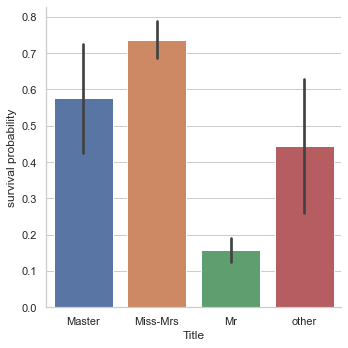

In [58]:
# 查看 Title 与 Survived 之间的相关性

g = sns.factorplot(x='Title', y='Survived', data=dataset, 
                   kind='bar')
g = g.set_xticklabels(['Master', 'Miss-Mrs', 'Mr', 'other'])
g = g.set_ylabels('survival probability')

#### 如上图所示，女性和Master头衔的人获救生存概率更高

In [59]:
# 删除掉字段：Name
dataset.drop(labels=['Name'], axis=1, inplace=True)

### 4.2 新字段：Family Size （fsize）家庭规模

In [60]:
# 家庭大小：SibSp（兄妹、配偶） + Parch（父母、子女） + 1（乘客本人）
dataset['fsize'] = dataset['SibSp'] + dataset['Parch'] + 1 # 新的字段：fsize

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


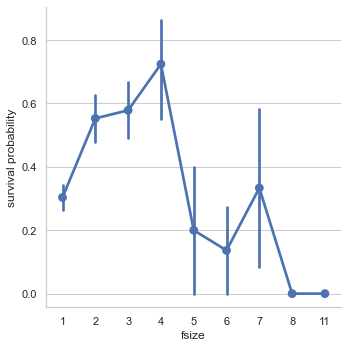

In [62]:
# 查看 fsize 与 survived 之间的相关性
g = sns.factorplot(x='fsize', y='Survived', data=dataset)
g = g.set_ylabels('survival probability')

In [63]:
# 家庭大小对生存率有极大影响，越大生存率越低
# 创建新的特征：Single, SmallF, MedianF, LargeF
dataset['Single'] = dataset['fsize'].map(lambda s:1 if s==1 else 0)
dataset['SmallF'] = dataset['fsize'].map(lambda s:1 if s==2 else 0)
dataset['MedianF'] = dataset['fsize'].map(lambda s:1 if 3 <= s <=4 else 0)
dataset['LargeF'] = dataset['fsize'].map(lambda s:1 if s>=5 else 0)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


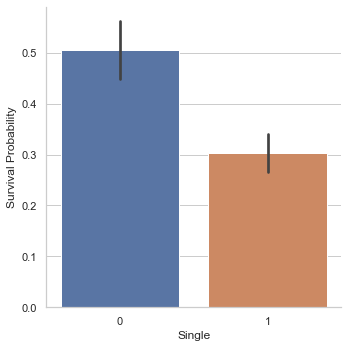

In [64]:
# 查看 Single, SmallF, MedianF, LargeF 与 Survived 之间的相关性
g = sns.factorplot(x='Single', y='Survived', data=dataset, kind='bar')
g = g.set_ylabels('Survival Probability')

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


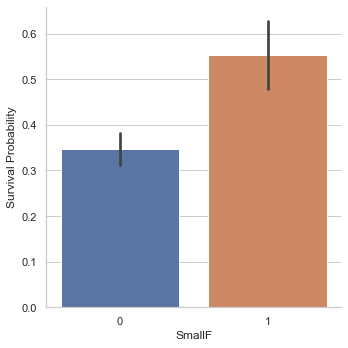

In [65]:
# 查看小家庭与Survival之间的相关性
g = sns.factorplot(x='SmallF', y='Survived', data=dataset, kind='bar')
g = g.set_ylabels('Survival Probability')

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


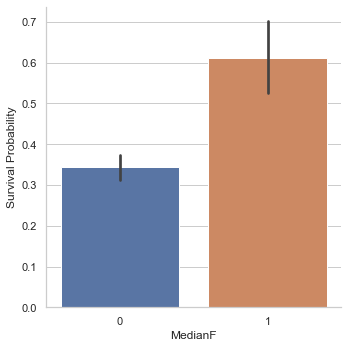

In [66]:
# 查看中等家庭与Survival之间的相关性
g = sns.factorplot(x='MedianF', y='Survived', data=dataset, kind='bar')
g = g.set_ylabels('Survival Probability')

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


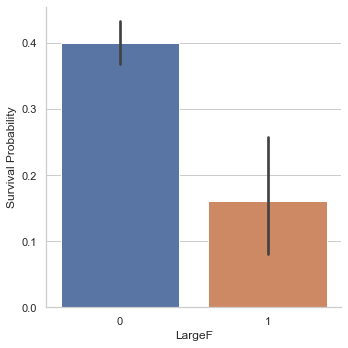

In [67]:
# 查看大家庭与Survival之间的相关性
g = sns.factorplot(x='LargeF', y='Survived', data=dataset, kind='bar')
g = g.set_ylabels('Survival Probability')

In [68]:
# 查看当前数据集的列
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'fsize', 'Single',
       'SmallF', 'MedianF', 'LargeF'],
      dtype='object')

In [69]:
# 通过pd.get_dummies() 将名义变量转变为one-hot编码

dataset = pd.get_dummies(dataset, columns=['Title'])
dataset = pd.get_dummies(dataset, columns=['Embarked'], prefix='Em')

#### 由于我们的模型在训练时，输入的数据必须是数值型，所以，需要将所有名义变量全部转换为数值类型

In [70]:
dataset.head() # 查看数据集

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SmallF,MedianF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,...,1,0,0,0,0,1,0,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,...,1,0,0,0,1,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,...,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,...,1,0,0,0,1,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,...,0,0,0,0,0,1,0,0,0,1


### 4.3 Cabin 船舱

In [71]:
# 查看船舱数据描述
dataset['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [72]:
# 统计Cabin字段的空缺值
dataset['Cabin'].isnull().sum()

1014

In [73]:
# Cabin不为空的值
dataset['Cabin'][dataset['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [74]:
# 如果Cabin为空值，则用'X'替代

dataset['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' 
                   for i in dataset['Cabin']])

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


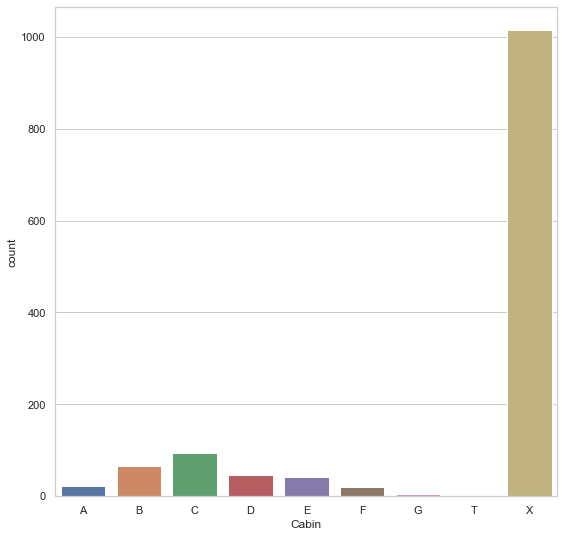

In [75]:
# 将Cabin字段数据的首字母当做一个特征，意味着乘客在不同的楼层

g = sns.countplot(dataset['Cabin'], 
                  order=['A','B','C','D','E','F','G','T', 'X'])

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


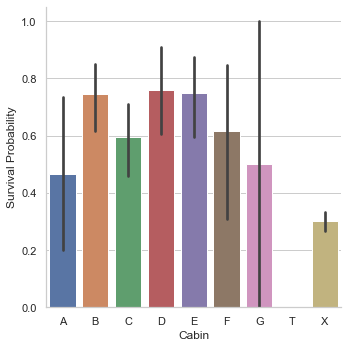

In [76]:
# 查看Cabin 与 Survival 之间的相关性

g = sns.factorplot(x='Cabin', y='Survived', data=dataset, kind='bar',
                   order=['A','B','C','D','E','F','G','T', 'X'])

g.set_ylabels('Survival Probability')

In [77]:
# 名义变量转换为one-hot编码

dataset = pd.get_dummies(dataset, columns=['Cabin'], prefix='Cabin')

### 4.4 Ticket 船票

In [78]:
dataset['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [79]:
# 1. 将Ticket中的 '/','.' 全部替换为 ''
# 2. 将Ticket中的首字母为数字的，全部替换为 'X'

Ticket = []

for i in list(dataset.Ticket):
    if not i.isdigit(): # 不是数字开头
        Ticket.append(i.replace('/','').replace('.','').strip().split(' ')[0]) # 获取前缀
    else:
        Ticket.append('X')

In [80]:
dataset['Ticket'] = Ticket

dataset['Ticket'].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [81]:
# 将 Ticket名义变量 转换为 one-hot 编码

dataset = pd.get_dummies(dataset, columns=['Ticket'], prefix='T')

In [82]:
# 将 Pclass 转换为 one-hot 编码
dataset = pd.get_dummies(dataset, columns=['Pclass'], prefix='Pc')

In [83]:
# 删除无用的变量：PassengerId

dataset.drop(labels=['PassengerId'], axis=1, inplace=True)

### 第5步：搭建模型

In [84]:
train_len = len(train)
train_len

891

In [85]:
train = dataset[:train_len]  # 训练集
test = dataset[train_len:]  # 测试集

In [86]:
# 删除掉test中的Survived这一列，刚才在dataset中默认添加了这一列，所以要删除
test.drop(labels=['Survived'], axis=1, inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [87]:
# 分开train的特征和标签

train['Survived'] = train['Survived'].astype(int) # 转换为 int 类型

y_train = train['Survived'] # 训练集标签

X_train = train.drop(labels=['Survived'], axis=1) # 训练集

C:\Users\lt200\AppData\Local\Temp/ipykernel_16344/2345680195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived'] = train['Survived'].astype(int) # 转换为 int 类型


### 5.1 基于Scikit-learn中的算法，进行训练、预测

In [88]:
# 采取10种算法，进行交叉验证

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [89]:
# K折交叉验证
kfold = StratifiedKFold(n_splits=10)

In [90]:
random_state = 666 # 随机种子

In [91]:
classifiers = []
# 创建算法分类器对象
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [92]:
cv_results = []
# 存放交叉验证的结果
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train,
                                     scoring='accuracy', cv=kfold, n_jobs=8))

In [94]:
cv_means = []  # 均值
cv_std = []  # 标准差

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [95]:
# 将各种算法求得的均值和标准差进行对比
cv_res = pd.DataFrame({
    'CrossValMeans' : cv_means,
    'CrossValStd' : cv_std,
    'Algorithm' : ['SVC', 'Decision Tree', 'AdaBoost', 'RandomForest', 'ExtraTrees', 'GradientBoosting', 'MultipleLayerPerceptron',
                   'KNeighbors', 'LogisticRegression', 'LinearDiscriminantAnalysis']
})

cv_res

,CrossValMeans,CrossValStd,Algorithm
0,0.728439,0.037824,SVC
1,0.801398,0.042645,Decision Tree
2,0.803683,0.046109,AdaBoost
3,0.810387,0.048778,RandomForest
4,0.807016,0.042831,ExtraTrees
5,0.835031,0.045177,GradientBoosting
6,0.817079,0.031271,MultipleLayerPerceptron
7,0.798027,0.042947,KNeighbors
8,0.828290,0.027950,LogisticRegression
9,0.827179,0.037236,LinearDiscriminantAnalysis


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


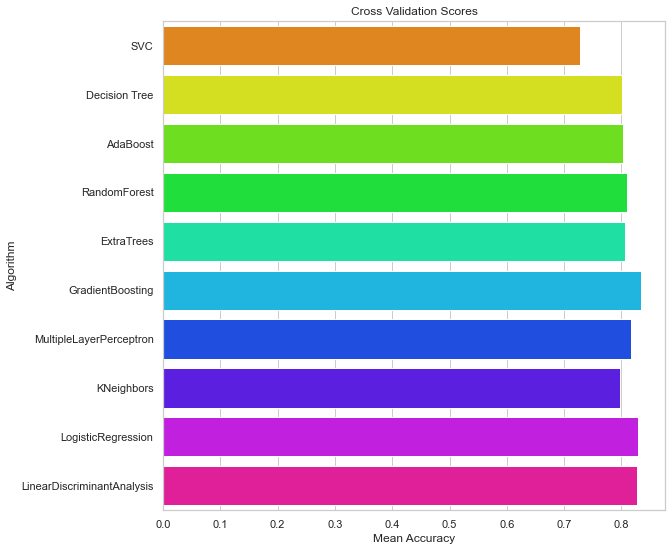

In [96]:
# 可视化算法结果
g = sns.barplot('CrossValMeans', 'Algorithm', data=cv_res, 
                palette='hsv', orient='h')
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross Validation Scores')

#### 如上图所示，可以发现很多算法的交叉训练结果都非常好，为了简单起见，从中挑选4种算法进一步调参。

1. AdaBoost

2. RandomForest

3. GradientBoosting

4. LogisticRegression

In [97]:
# 1. AdaBoost
DTC = DecisionTreeClassifier()  # 决策树对象
adaDTC = AdaBoostClassifier(DTC, random_state=666)

# 网格搜索参数
ada_param = {
    'base_estimator__criterion' : ['entropy', 'gini'],
    'base_estimator__splitter' : ['best', 'random'],
    'n_estimators' : [3, 4, 5, 6],
    'learning_rate' : [0.001, 0.01, 0.1]
}

gsAdaDTC = GridSearchCV(adaDTC, param_grid=ada_param, cv=kfold, scoring='accuracy', n_jobs=8, verbose=1)

gsAdaDTC.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=666),
             n_jobs=8,
             param_grid={'base_estimator__criterion': ['entropy', 'gini'],
                         'base_estimator__splitter': ['best', 'random'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [3, 4, 5, 6]},
             scoring='accuracy', verbose=1)

In [100]:
# 获取到最好的参数
ada_best = gsAdaDTC.best_estimator_
ada_best

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   n_estimators=4, random_state=666)

In [99]:
# 最好的得分
gsAdaDTC.best_score_

0.8159925093632958

In [101]:
# 2 RandomForest

RFC = RandomForestClassifier()

# 网格搜索参数
rf_param = {
    'max_depth' : [2, 3, 4, 5],
    'max_features' : [3, 6, 9],
    'min_samples_split' : [2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3],
    'n_estimators' : [100, 300],
    'criterion' : ['gini', 'entropy']
}

gsRFC = GridSearchCV(RFC, param_grid=rf_param, cv=kfold, scoring='accuracy', n_jobs=8)

gsRFC.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5], 'max_features': [3, 6, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [102]:
# 最好的参数
RFC_best = gsRFC.best_estimator_

In [103]:
# 最好的得分
gsRFC.best_score_

0.8361423220973782

In [104]:
# 3 GradientBoosting

GBC = GradientBoostingClassifier()

gb_param = {
    'loss' : ['deviance'],
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.1, 0.05, 0.01],
    'max_depth' : [2, 3, 4, 6],
    'min_samples_leaf' : [100, 150],
    'max_features' : [0.3, 0.2, 0.1]
}

gsGBC = GridSearchCV(GBC, param_grid=gb_param, cv=kfold, scoring='accuracy', n_jobs=8)

gsGBC.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=8,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [2, 3, 4, 6],
                         'max_features': [0.3, 0.2, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [105]:
# 最好的参数
GBC_best = gsGBC.best_estimator_

In [106]:
gsGBC.best_score_

0.8372908863920099

In [107]:
# 4 LogisticRegression

LR = LogisticRegression()

lr_param = {
    'penalty' : ['l1', 'l2'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'max_iter' : [100, 200]
}

gs_LR = GridSearchCV(LR, param_grid=lr_param, cv=kfold, scoring='accuracy', n_jobs=-1)

gs_LR.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.82491885        nan 0.82828964 0.82828964
 0.82828964 0.81930087        nan        nan 0.82491885        nan
 0.82828964 0.82828964 0.82828964 0.82715356]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 200], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='accuracy')

In [108]:
# 最好的参数
LR_best = gs_LR.best_estimator_

In [109]:
gs_LR.best_score_

0.8282896379525593

### 5.2 绘制学习曲线

In [110]:
# 在训练集上查看师傅过拟合和准确度

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    # 绘制训练学习曲线
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1) # train score均值
    train_scores_std  = np.std(train_scores, axis=1) # train score标准差
    
    test_scores_mean = np.mean(test_scores, axis=1) # test score均值
    test_scores_std = np.std(test_scores, axis=1) # test score标准差
    
    plt.grid()
    
    # 坐标轴范围
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='b')
    
    # 绘制折线图
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='b', label='Cross-Validation score')
    
    plt.legend(loc='best')
    
    return plt

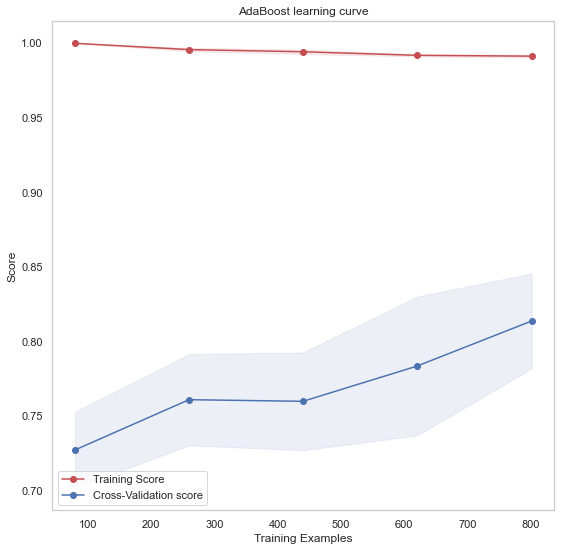

In [111]:
# AdaBoosting 学习曲线
g = plot_learning_curve(gsAdaDTC.best_estimator_, 'AdaBoost learning curve', X_train, y_train, cv=kfold)

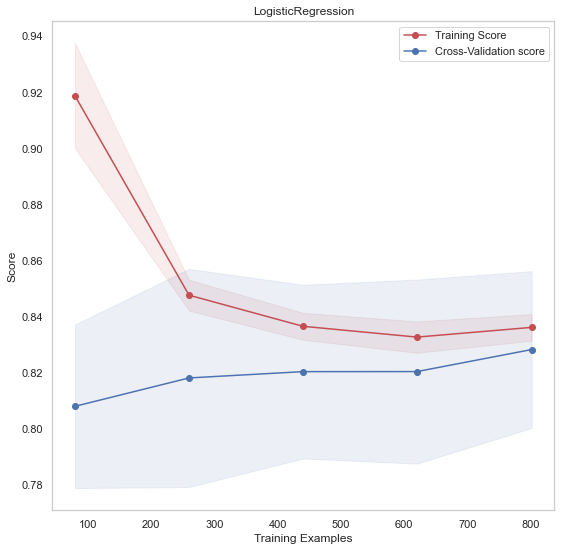

In [112]:
# 逻辑回归学习曲线
g = plot_learning_curve(gs_LR.best_estimator_, 'LogisticRegression', X_train, y_train, cv=kfold)

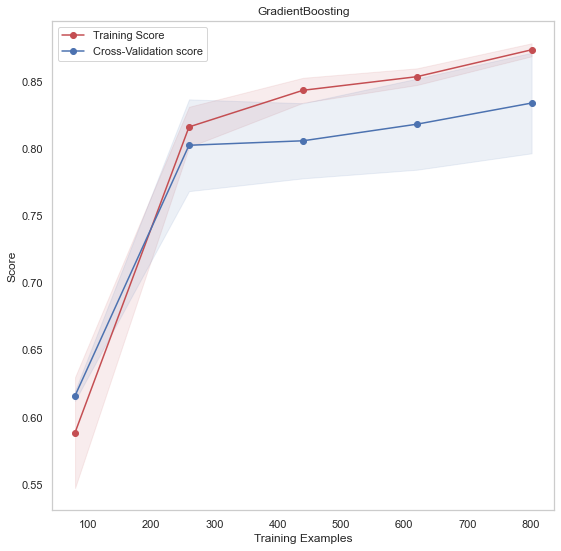

In [113]:
# 梯度上升法学习曲线
g = plot_learning_curve(gsGBC.best_estimator_, 'GradientBoosting', X_train, y_train, cv=kfold)

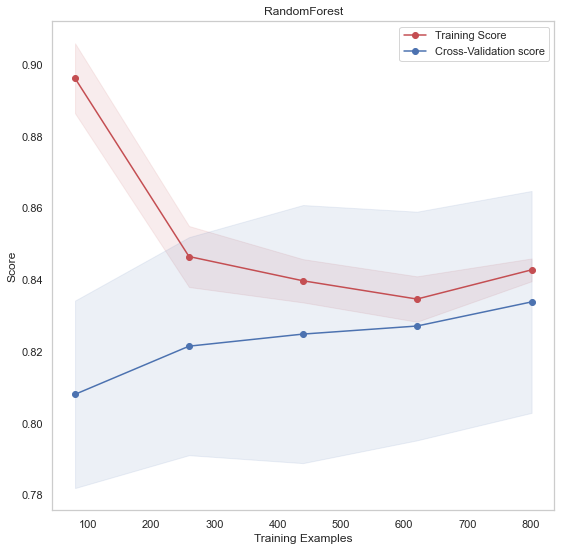

In [114]:
# 随机森林学习曲线
g = plot_learning_curve(gsRFC.best_estimator_, 'RandomForest', X_train, y_train, cv=kfold)

### 5.3 特征重要性排名

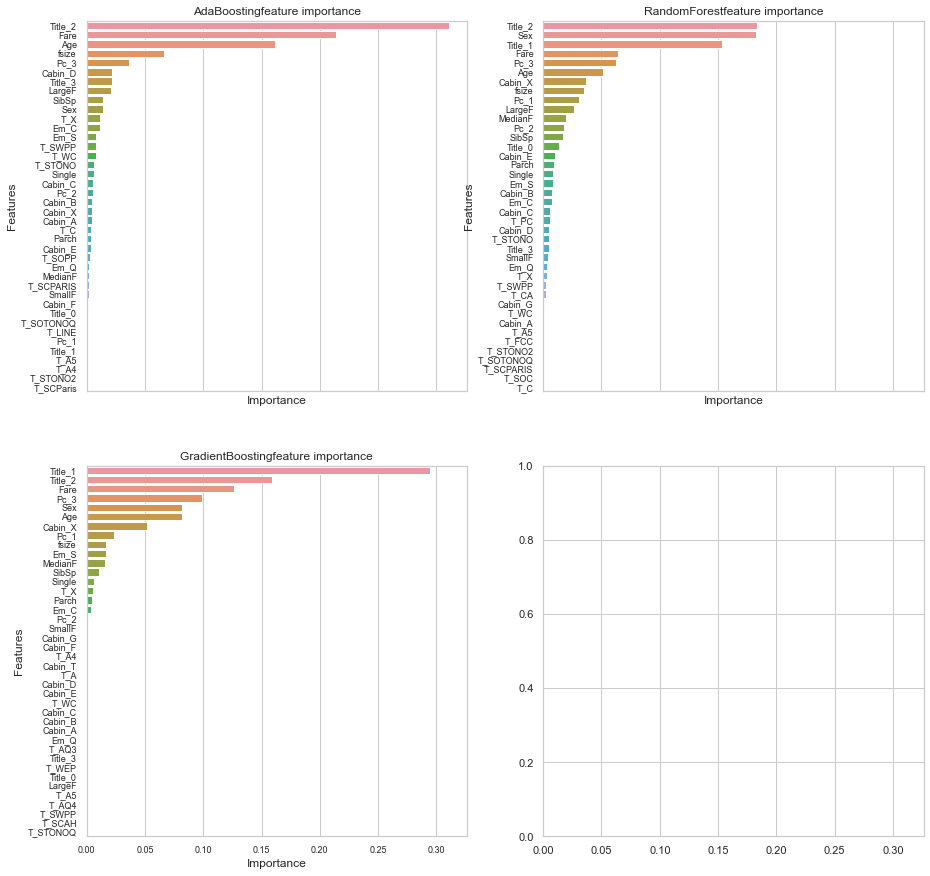

In [115]:
nrows = 2 # 行数
ncols = 2 # 列数

# 设置画布大小
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex='all', figsize=(15, 15))

# 获取4种算法最好的参数
names_classifiers = [('AdaBoosting', ada_best), ('RandomForest', RFC_best), 
                     ('GradientBoosting', GBC_best)]

n_cls = 0

for row in range(nrows):
    for col in range(ncols):
        if n_cls == 3: # 只显示3个算法的特征排名，因为，逻辑回归没有feature_importance_这个属性
            break
        classifier_name = names_classifiers[n_cls][0] # 算法名称
        classifier = names_classifiers[n_cls][1] # 算法模型
        indices = np.argsort(classifier.feature_importances_)[::-1][:40] # 计算出特征重要性排名，挑选出最重要的前40个（这里是索引）
        g = sns.barplot(y=X_train.columns[indices][:40], x=classifier.feature_importances_[indices][:40],
                        orient='h', ax=axes[row][col]) # y:特征列名称，x: 特征值，orient: 方向，ax: 显示位置
        g.set_xlabel('Importance', fontsize=12) # 设x轴显示，字体大小
        g.set_ylabel('Features', fontsize=12) # 设置y轴显示，字体大小
        g.tick_params(labelsize=9) # 
        g.set_title(classifier_name + 'feature importance') # 设置标题，格式：算法名称 + 字符串
        
        n_cls += 1 # 索引自增

#### 根据以上分析，特征：title, age, family size, 乘客社会地位相关

### 5.4 模型预测

In [116]:
# 1 随机森林预测test
test_Survived_RFC = pd.Series(RFC_best.predict(test), name='RFC')

# 2 GradientBoosting预测test
test_Survived_GB = pd.Series(GBC_best.predict(test), name='GBC')

# 3 AdaBoosting预测test
test_Survived_AB = pd.Series(ada_best.predict(test), name='Ada')

# 4 LogisticRegression预测test
test_Survived_LR = pd.Series(LR_best.predict(test), name='LR')

In [117]:
# 把所有预测结果合并起来
ensemble_results = pd.concat([test_Survived_AB, test_Survived_GB, test_Survived_LR, test_Survived_RFC], axis=1)

### 5.5 集成模型

In [118]:
# 将4种模型集成起来，当做一个模型

voting_clf = VotingClassifier(estimators=[('rfc', RFC_best), ('GBC', GBC_best), 
                                          ('Ada', ada_best), ('LR', LR_best)], n_jobs=-1)

In [119]:
# 在train上训练

voting_clf = voting_clf.fit(X_train, y_train)

### 5.6 对test预测

In [120]:
test_Survived = pd.Series(voting_clf.predict(test), name='Survived')

test_Survived

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int32

#### 上图即为最终的test的预测结果，0：表示未被获救，1：表示被获救